<a href="https://colab.research.google.com/github/Aireenelz/WIE3007-DMW-Group6/blob/main/eda_and_feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision torchaudio transformers accelerate bitsandbytes --quiet
!pip install -U bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 16.1 MB/s eta 0:00:00


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
import os
import random
from datetime import datetime, timedelta

from transformers import pipeline, AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch

In [3]:
drive.mount('/content/drive')

drive_folder = "/content/drive/MyDrive/Aireen Y4S1/WIE3007 DATA MINING AND WAREHOUSING/Group Assignment 15%/Group Assignment Group6"

Mounted at /content/drive


In [4]:
# Setup huggingface token
from google.colab import userdata
HUGGINGFACE_TOKEN = userdata.get("HF_TOKEN")

from huggingface_hub import login
login(token=HUGGINGFACE_TOKEN)

# Exploratory Data Analysis (EDA) with LLM Insights

## Summary Statistics

In [5]:
df = pd.read_csv(os.path.join(drive_folder, "synthetic_financial_data.csv"))
df.sample(10)

CustomerID  Age    Education EmploymentType EmploymentSector  \
835         836   35     Bachelor      Full-Time       Government   
864         865   49     Bachelor      Full-Time       Government   
776         777   47    Associate      Full-Time     Construction   
141         142   35     Bachelor      Full-Time     Construction   
158         159   25     Bachelor      Full-Time          Finance   
677         678   36  High School      Full-Time     Construction   
616         617   24  High School      Full-Time           Retail   
383         384   39     Bachelor  Self-Employed       Government   
805         806   39          PhD      Full-Time          Finance   
72           73   69  High School       Contract          Finance   

     EmploymentLengthYears  MonthlyIncome MaritalStatus  Dependents  \
835                     16   11620.461741        Single           0   
864                     26   11932.897924        Single           0   
776                      2    6022.814348       Married           2   
141                      2   14643.441231       Married           4   
158                      0    7535.097299        Single           0   
677                      9   10005.608706       Married           0   
616                      1    3346.805115        Single           0   
383                     14    7919.517023        Single           0   
805                      0   15708.930536       Married           1   
72                      32    6556.210057       Married           2   

       PropertyOwnership  ...  MonthlyDebt  YearsWithBank  HasSavingsAccount  \
835                 Rent  ...  3831.903744             13                  1   
864    Own with Mortgage  ...  4175.595028             26                  1   
776         Own Outright  ...  2111.408536             11                  1   
141    Own with Mortgage  ...  2089.269812              3                  1   
158  Living with Parents  ...   514.141526              6                  1   
677    Own with Mortgage  ...  3858.091276              3                  1   
616                 Rent  ...   906.017231              6                  1   
383                 Rent  ...  3504.547201             18                  1   
805    Own with Mortgage  ...  5143.642221              6                  1   
72          Own Outright  ...  1633.385953              3                  1   

     HasCheckingAccount         LoanPurpose    LoanAmount LoanTermMonths  \
835                   0            Personal  12174.669987             12   
864                   0            Personal  23486.866347             24   
776                   0            Personal  24668.075368             48   
141                   1             Medical  20573.434573             36   
158                   0             Wedding   8841.450954             48   
677                   1  Debt Consolidation  40469.041844             24   
616                   0  Debt Consolidation  20065.506885             36   
383                   0             Wedding  21786.978717             60   
805                   1             Medical   5183.945741             48   
72                    1             Wedding  20552.167506             12   

     InterestRate  LoanDefault  \
835      6.568750            0   
864      6.501113            0   
776      8.550235            0   
141      3.587163            0   
158      4.825886            0   
677      9.369489            0   
616     17.449517            1   
383     10.795969            0   
805      5.612586            0   
72       8.348562            0   

                                LoanPurposeDescription  
835  Applying for financing to cover the cost of th...  
864                         Need funds for a new game.  
776                                                NaN  
141                        Need funds for the project.  
158                 Need funds for the next few weeks.  
677  Need to refinance exist

In [6]:
df.head()

CustomerID  Age    Education EmploymentType EmploymentSector  \
0           1   56     Bachelor      Full-Time           Retail   
1           2   41  High School      Full-Time     Construction   
2           3   38     Bachelor      Full-Time          Finance   
3           4   32     Bachelor       Contract       Government   
4           5   38     Bachelor       Contract        Education   

   EmploymentLengthYears  MonthlyIncome MaritalStatus  Dependents  \
0                     14   11413.035298       Married           0   
1                      7    7203.039750        Single           0   
2                     11   13724.533663       Married           3   
3                     13    9464.454897        Single           0   
4                     17   11770.841248      Divorced           0   

   PropertyOwnership  ...  MonthlyDebt  YearsWithBank  HasSavingsAccount  \
0               Rent  ...  2350.379946             10                  1   
1  Own with Mortgage  ...  1297.827096              1                  0   
2               Rent  ...  3057.926084             15                  1   
3  Own with Mortgage  ...  2324.616801              6                  1   
4  Own with Mortgage  ...  4538.253010              1                  1   

   HasCheckingAccount       LoanPurpose     LoanAmount LoanTermMonths  \
0                   1          Vacation   19921.253949             12   
1                   1          Personal    6410.289476             36   
2                   0  Home Improvement   20296.322368             36   
3                   1  Home Improvement   29580.772145             60   
4                   1          Business  123575.438123            240   

   InterestRate  LoanDefault  \
0      3.749937            0   
1      5.846382            0   
2      6.376434            0   
3     10.509791            0   
4      5.547899            0   

                              LoanPurposeDescription  
0                        Need funds for the project.  
1  Applying for financing to cover the costs of t...  
2    I need a personal loan for me to buy a new car.  
3  I need a personal loan for me to get a job in ...  
4  Seeking financing to start my own company, I w...  

[5 rows x 22 columns]

In [7]:
df.tail()

CustomerID  Age  Education EmploymentType EmploymentSector  \
995         996   52     Master      Full-Time           Retail   
996         997   53     Master  Self-Employed     Construction   
997         998   30     Master      Full-Time       Healthcare   
998         999   23   Bachelor      Part-Time       Technology   
999        1000   24  Associate      Part-Time         Services   

     EmploymentLengthYears  MonthlyIncome MaritalStatus  Dependents  \
995                      1    9955.570024       Married           0   
996                      6    9964.384210      Divorced           1   
997                     10   12460.858625      Divorced           0   
998                      3    1900.565977      Divorced           0   
999                      2    2310.269752        Single           1   

     PropertyOwnership  ...  MonthlyDebt  YearsWithBank  HasSavingsAccount  \
995       Own Outright  ...  2175.206405             12                  1   
996  Own with Mortgage  ...  3578.589991             22                  1   
997  Own with Mortgage  ...  1643.310948              8                  1   
998               Rent  ...   672.322499              2                  1   
999               Rent  ...   655.840484              3                  1   

     HasCheckingAccount         LoanPurpose    LoanAmount LoanTermMonths  \
995                   1            Car Loan  22996.505157             48   
996                   1            Car Loan  32930.512632             60   
997                   1  Debt Consolidation  18044.630579             24   
998                   1            Car Loan  27524.440552             48   
999                   1            Car Loan  34025.845122             48   

     InterestRate  LoanDefault  \
995      3.583308            0   
996      9.498470            0   
997      4.937098            0   
998     18.874456            1   
999      8.854675            0   

                                LoanPurposeDescription  
995  Applying for auto financing to purchase a car ...  
996  Looking to finance a car because of the cost o...  
997  Need to refinance existing loans because the l...  
998  Applying for auto financing to purchase a car,...  
999  I need a car loan to buy a vehicle for a futur...  

[5 rows x 22 columns]

In [8]:
# Data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1000 non-null   int64  
 1   Age                     1000 non-null   int64  
 2   Education               1000 non-null   object 
 3   EmploymentType          1000 non-null   object 
 4   EmploymentSector        1000 non-null   object 
 5   EmploymentLengthYears   1000 non-null   int64  
 6   MonthlyIncome           1000 non-null   float64
 7   MaritalStatus           1000 non-null   object 
 8   Dependents              1000 non-null   int64  
 9   PropertyOwnership       1000 non-null   object 
 10  CreditScore             1000 non-null   int64  
 11  ExistingLoans           1000 non-null   int64  
 12  MonthlyDebt             1000 non-null   float64
 13  YearsWithBank           1000 non-null   int64  
 14  HasSavingsAccount       1000 non-null   i

- The dataset has a total of 1,000 rows and 22 columns
- Data Types:
  - CustomerID is represented as an integer (unique identifier for each customer).
  - Age, EmploymentLengthYears, MonthlyIncome, Dependents, CreditScore, ExistingLoans, MonthlyDebt, YearsWithBank, LoanAmount, LoanTermMonths, InterestRate, LoanDefault, HasSavingsAccount, HasCheckingAccount are represented as numeric (integer or float) since they contain measurable or binary 0/1 data.
  - Education, EmploymentType, EmploymentSector, MaritalStatus, PropertyOwnership, LoanPurpose are represented as categorical (category type) because they describe groups or labels rather than numbers.
  - LoanPurposeDescription is represented as an object/string because it contains text descriptions.

In [9]:
# Summary statistics
df.describe()

CustomerID          Age  EmploymentLengthYears  MonthlyIncome  \
count  1000.000000  1000.000000            1000.000000    1000.000000   
mean    500.500000    43.115000              11.596000    8129.959428   
std     288.819436    14.799689              10.408704    4232.781830   
min       1.000000    18.000000               0.000000      91.791920   
25%     250.750000    31.000000               3.000000    4971.133380   
50%     500.500000    43.000000               9.000000    7903.090484   
75%     750.250000    56.000000              18.000000   10753.651050   
max    1000.000000    69.000000              39.000000   29350.426220   

        Dependents  CreditScore  ExistingLoans   MonthlyDebt  YearsWithBank  \
count  1000.000000  1000.000000    1000.000000   1000.000000    1000.000000   
mean      0.993000   700.775000       1.323000   2023.388314      10.222000   
std       1.120806    74.477374       1.037182   1252.776462       8.234228   
min       0.000000   458.000000       0.000000     48.966779       0.000000   
25%       0.000000   659.000000       1.000000   1116.085156       3.000000   
50%       1.000000   708.000000       1.000000   1766.586866       8.000000   
75%       2.000000   754.000000       2.000000   2640.736336      17.000000   
max       4.000000   850.000000       4.000000  10611.090487      29.000000   

       HasSavingsAccount  HasCheckingAccount     LoanAmount  LoanTermMonths  \
count        1000.000000         1000.000000    1000.000000     1000.000000   
mean            0.716000            0.678000   53711.857393       77.232000   
std             0.451162            0.467477   80032.688212       83.216339   
min             0.000000            0.000000    5027.802355       12.000000   
25%             0.000000            0.000000   16000.784352       36.000000   
50%             1.000000            1.000000   25199.496037       48.000000   
75%             1.000000            1.000000   45283.602469       72.000000   
max             1.000000            1.000000  479306.374718      360.000000   

       InterestRate  LoanDefault  
count   1000.000000  1000.000000  
mean       8.539705     0.106000  
std        3.784602     0.307992  
min        3.510908     0.000000  
25%        5.674759     0.000000  
50%        7.872387     0.000000  
75%       10.383675     0.000000  
max       19.962159     1.000000

- CustomerID ranges from 1–1000 (unique identifier).
- Age has an average of ~43 years (min 18, max 69), showing a mix of young to mid-age adults.
- EmploymentLengthYears averages ~11.6 years, ranging from 0–39, indicating varied work experience levels.
- MonthlyIncome has a wide range (≈ RM92 to RM29,350), with a mean of ~RM8,130; suggests mixed income groups.
- Dependents is mostly 0–2 dependents (median = 1), max is 4.
- CreditScore centers around 700 (min 458, max 850), representing mostly “fair to good” credit profiles.
- ExistingLoans averages 1–2 loans (max 4), meaning most customers already have some credit commitments.
- MonthlyDebt varies significantly (≈ RM49 to RM10,611), average ~RM2,023; debt burdens differ widely.
- YearsWithBank shows a median of 8 years, max 29, indicating generally long-term customer relationships.
- HasSavingsAccount is binary; ~72% have savings (1) and ~28% do not (0).
- HasCheckingAccount is binary; ~68% have checking accounts (1) and ~32% do not (0).
- LoanAmount ranges from ~RM5,000 to RM479,000; mean ~RM53,712, showing large variance in loan size.
- LoanTermMonths typically ranges 12–72 months (max 360), median is 48 months (~4 years loan term).
- InterestRate averages ~8.5% (min 3.5%, max 19.9%), indicating different risk-based pricing.
- LoanDefault is binary; ~10.6% of customers have defaulted (class imbalance: most are non-defaults).

In [10]:
clean_df = df.copy()

# Change object to category
clean_df["Education"] = clean_df["Education"].astype("category")
clean_df["EmploymentType"] = clean_df["EmploymentType"].astype("category")
clean_df["EmploymentSector"] = clean_df["EmploymentSector"].astype("category")
clean_df["MaritalStatus"] = clean_df["MaritalStatus"].astype("category")
clean_df["PropertyOwnership"] = clean_df["PropertyOwnership"].astype("category")
clean_df["LoanPurpose"] = clean_df["LoanPurpose"].astype("category")

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   CustomerID              1000 non-null   int64   
 1   Age                     1000 non-null   int64   
 2   Education               1000 non-null   category
 3   EmploymentType          1000 non-null   category
 4   EmploymentSector        1000 non-null   category
 5   EmploymentLengthYears   1000 non-null   int64   
 6   MonthlyIncome           1000 non-null   float64 
 7   MaritalStatus           1000 non-null   category
 8   Dependents              1000 non-null   int64   
 9   PropertyOwnership       1000 non-null   category
 10  CreditScore             1000 non-null   int64   
 11  ExistingLoans           1000 non-null   int64   
 12  MonthlyDebt             1000 non-null   float64 
 13  YearsWithBank           1000 non-null   int64   
 14  HasSavingsAccount       1

In [11]:
numeric_features = ["Age", "EmploymentLengthYears", "MonthlyIncome", "Dependents", "CreditScore", "ExistingLoans", "MonthlyDebt", "YearsWithBank", "HasSavingsAccount","HasCheckingAccount","LoanAmount", "LoanTermMonths", "InterestRate", "LoanDefault"]
categorical_features = ["Education", "EmploymentType", "EmploymentSector", "MaritalStatus", "PropertyOwnership", "LoanPurpose"]

## Distributions

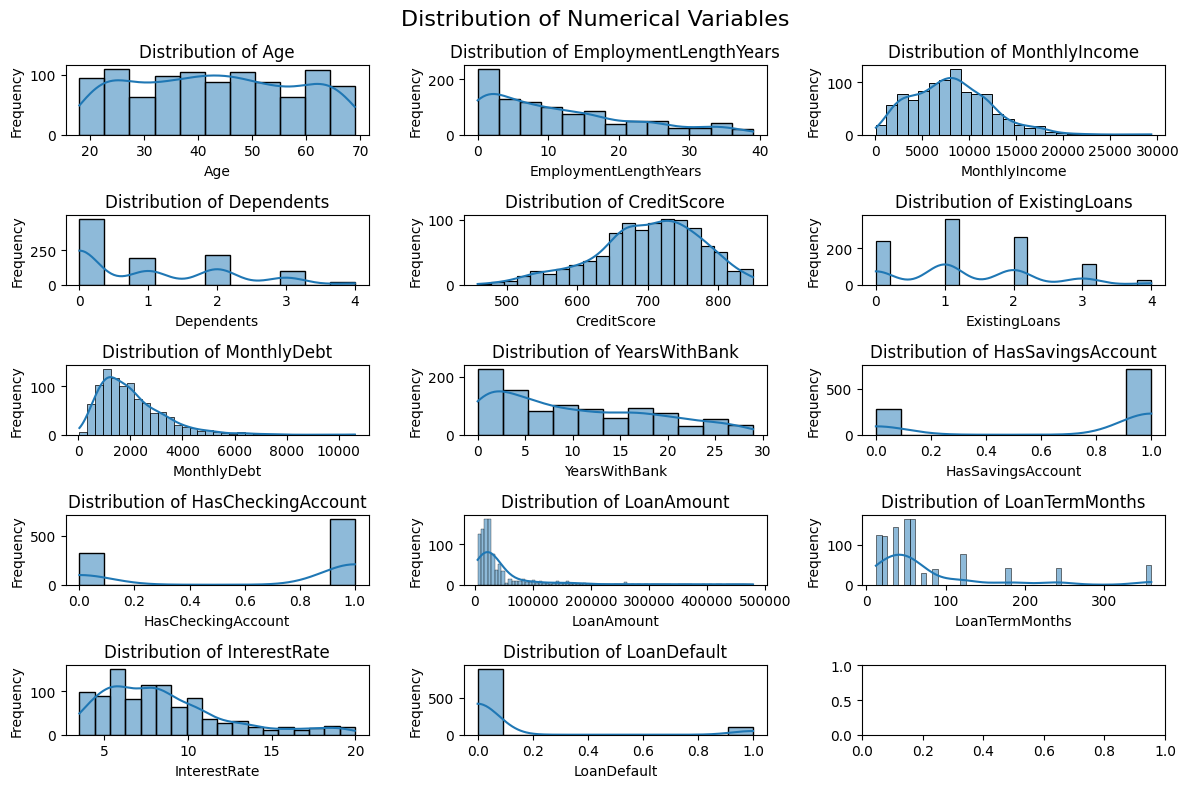

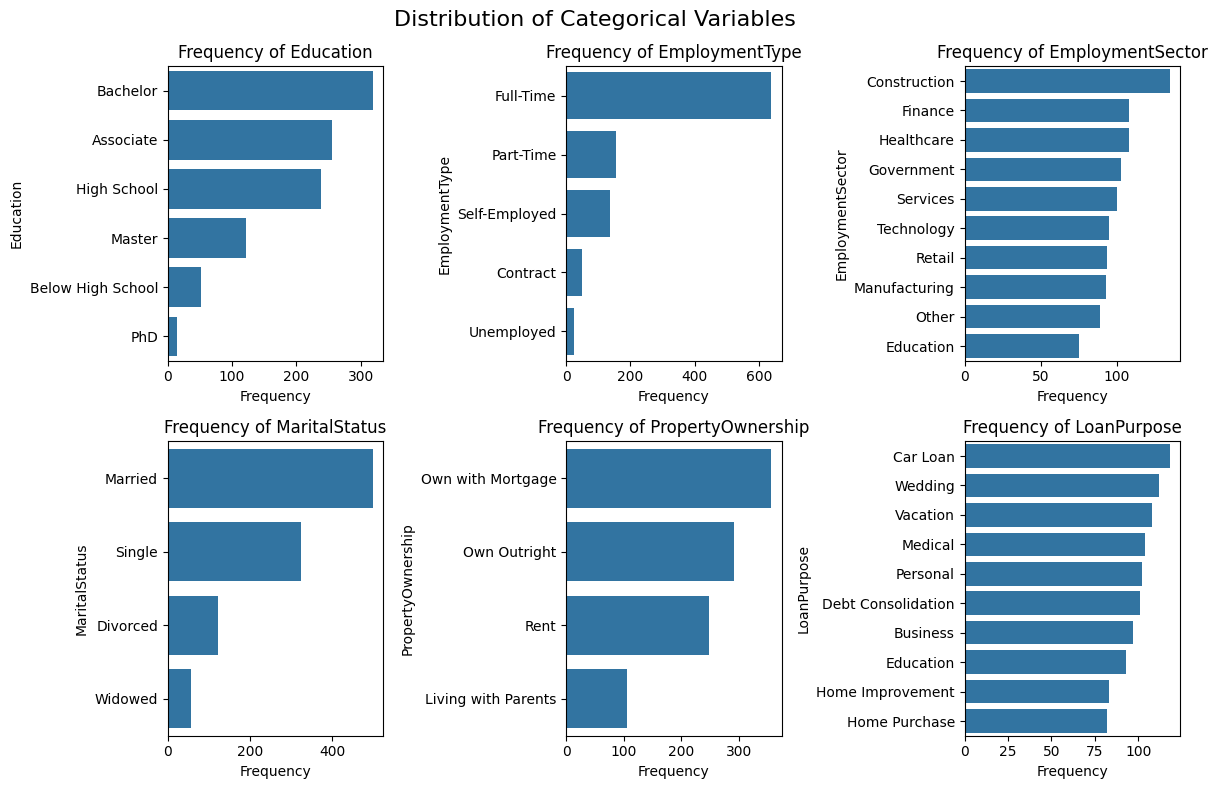

In [14]:
# Distribution

# Numerical columns (histogram)
fig1, axes1 = plt.subplots(5, 3, figsize=(12,8))
fig1.suptitle("Distribution of Numerical Variables", fontsize=16)

for i, col in enumerate(numeric_features):
  r, c = divmod(i, 3)
  sns.histplot(clean_df[col], kde=True, ax=axes1[r, c])
  axes1[r, c].set_title(f"Distribution of {col}")
  axes1[r, c].set_xlabel(col)
  axes1[r, c].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

# Categorical columns (bar chart)
fig2, axes2 = plt.subplots(2, 3, figsize=(12,8))
fig2.suptitle("Distribution of Categorical Variables", fontsize=16)

for j, col in enumerate(categorical_features):
  r, c = divmod(j, 3)
  col_str = clean_df[col].astype(str).replace("nan", "NaN")
  sns.countplot(y=col_str, order=col_str.value_counts().index, ax=axes2[r, c])
  axes2[r, c].set_title(f"Frequency of {col}")
  axes2[r, c].set_xlabel("Frequency")
  axes2[r, c].set_ylabel(col)

plt.tight_layout()
plt.show()

Distribution of numerical variables: as per above descriptions

Distribution of categoricall variables:
- Education: most common education is Bachelor's degree, followed by Associate and High School. Master's degree is moderate. Below High School and PhD are the least
- EmploymentType: most are employed full-time, some part-time or self-employed, least are contract and unemployed
- EmploymentSector: balance across all sectors
- MaritalStatus: mostly married, or single. Divorced and Windowed are the of smaller proportions
- PropertyOwnership: most own with mortgage, followed by own outright and renting. Living with parents is the least.
- LoanPurpose: relatively balance across all purposes, top purposes are for car loan, wedding, vacation

## Correlations

Pairplot


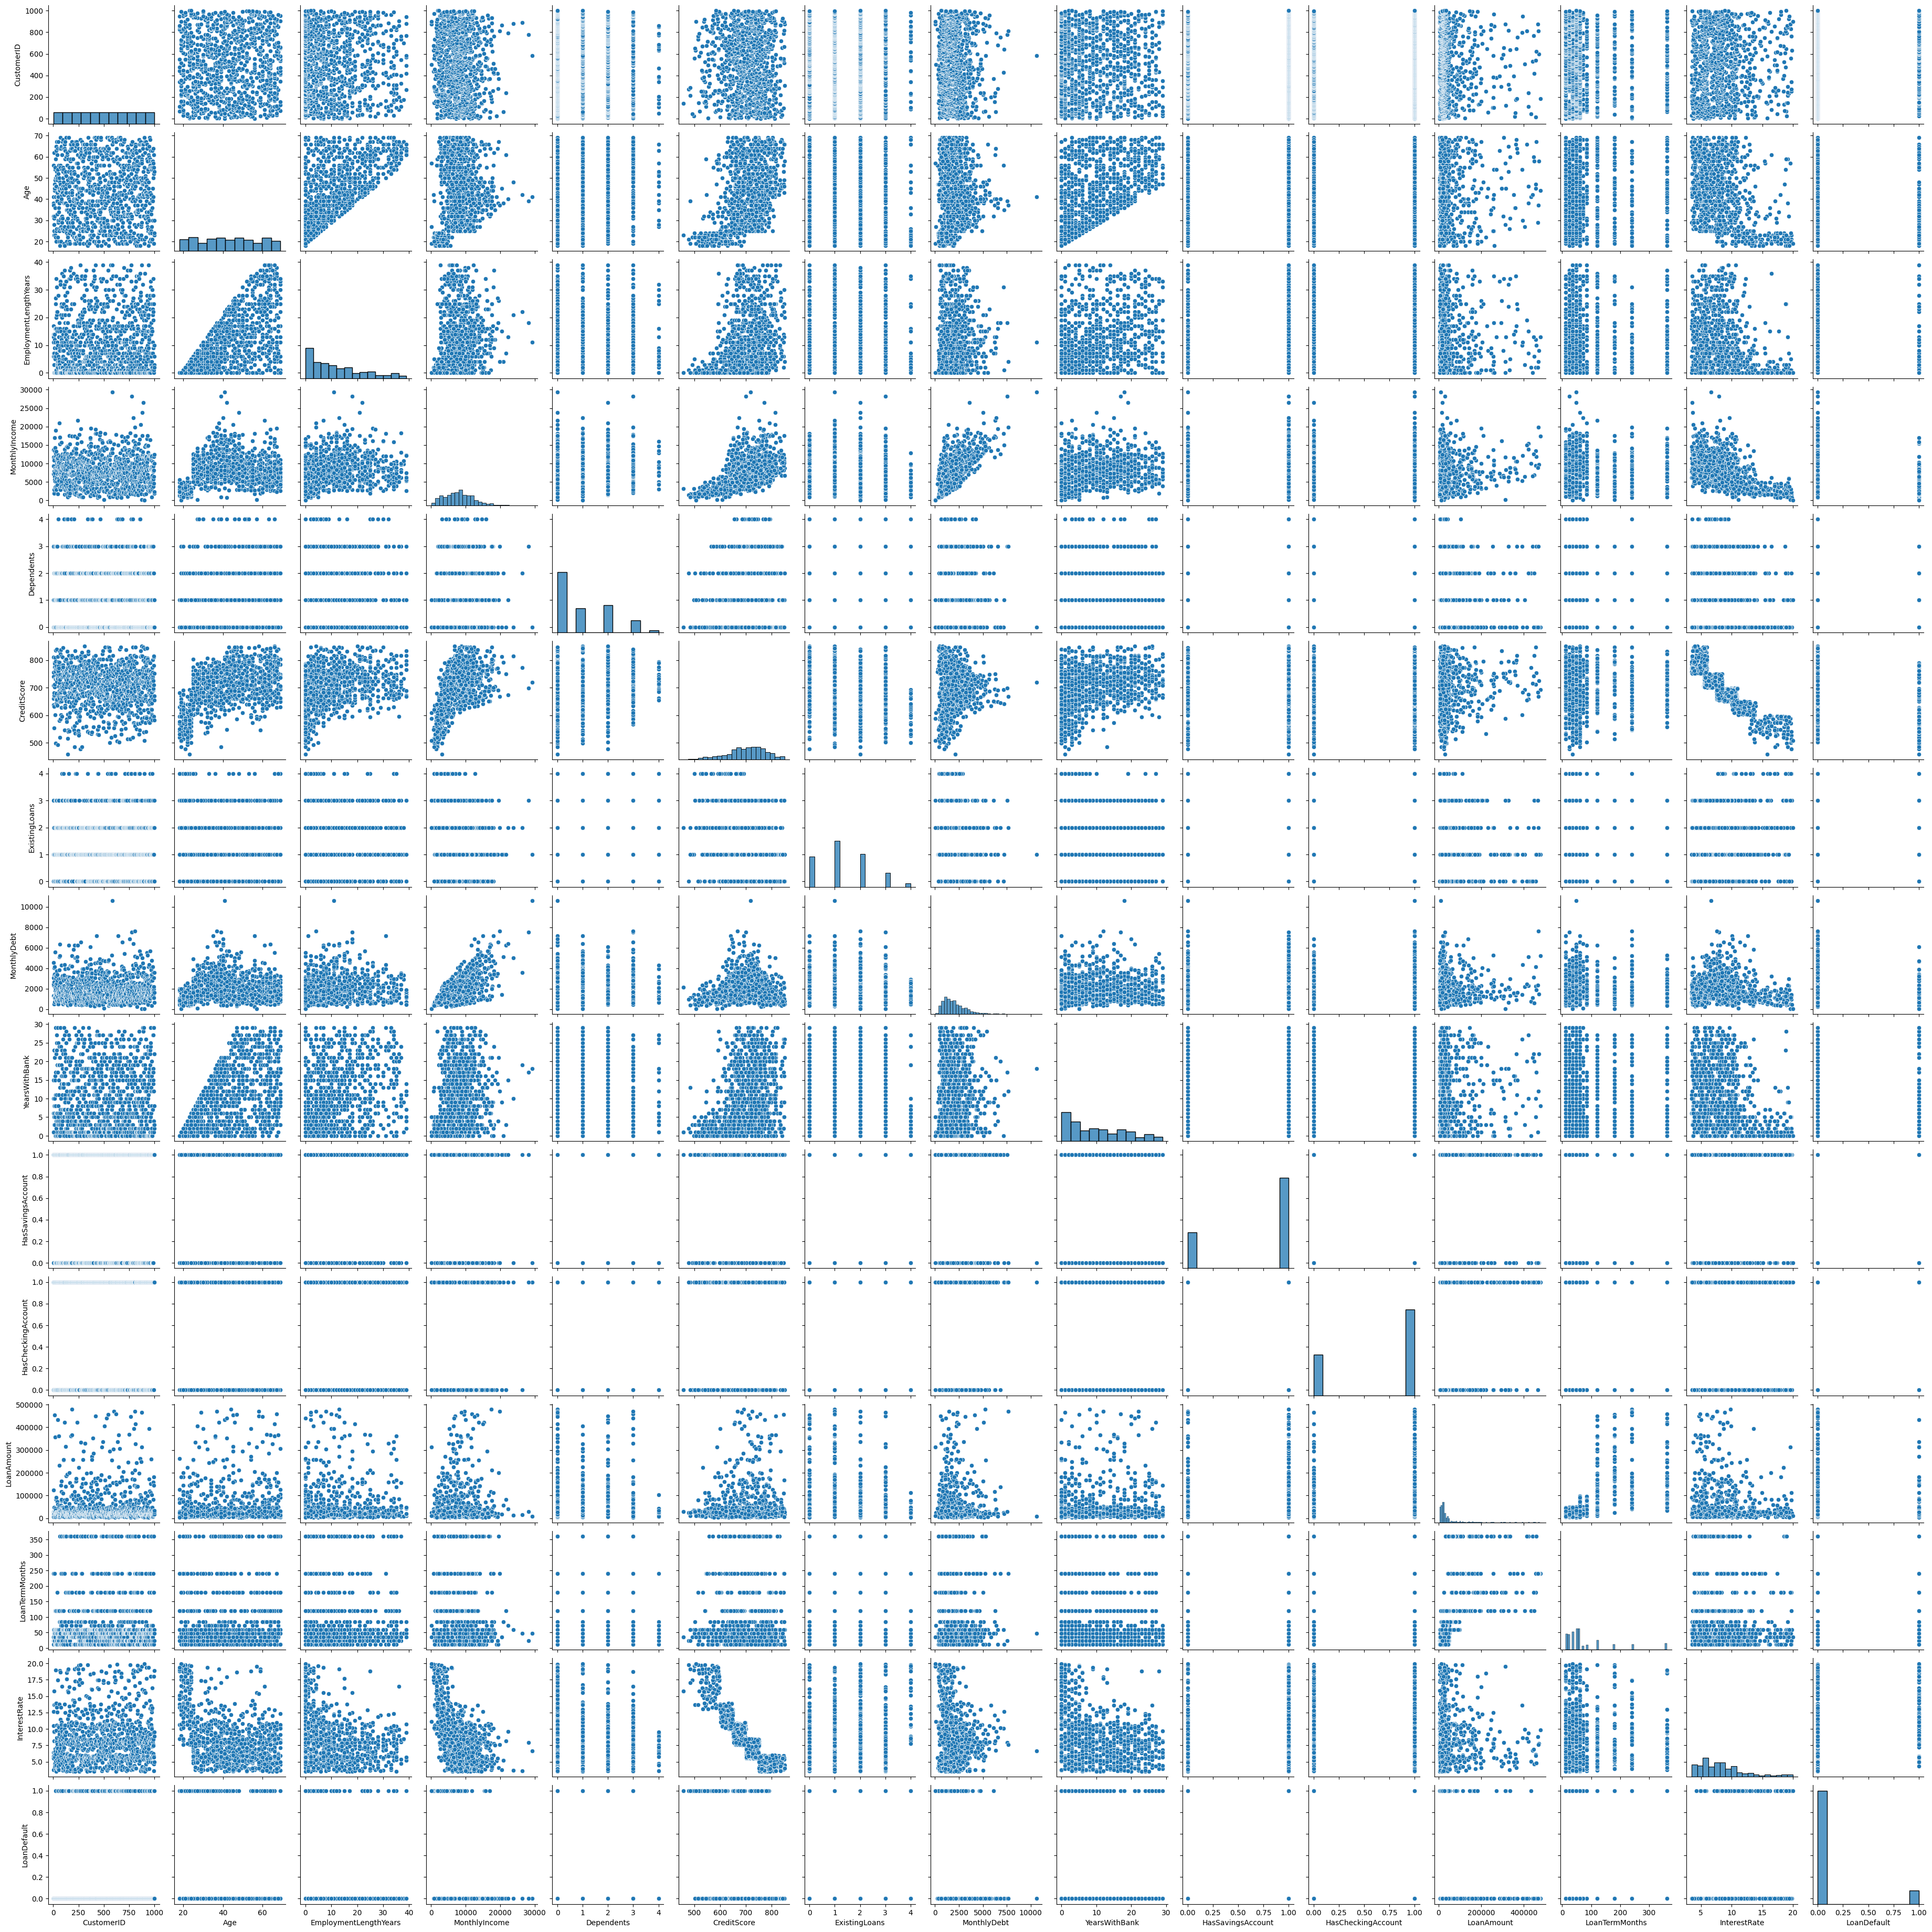

Heatmap


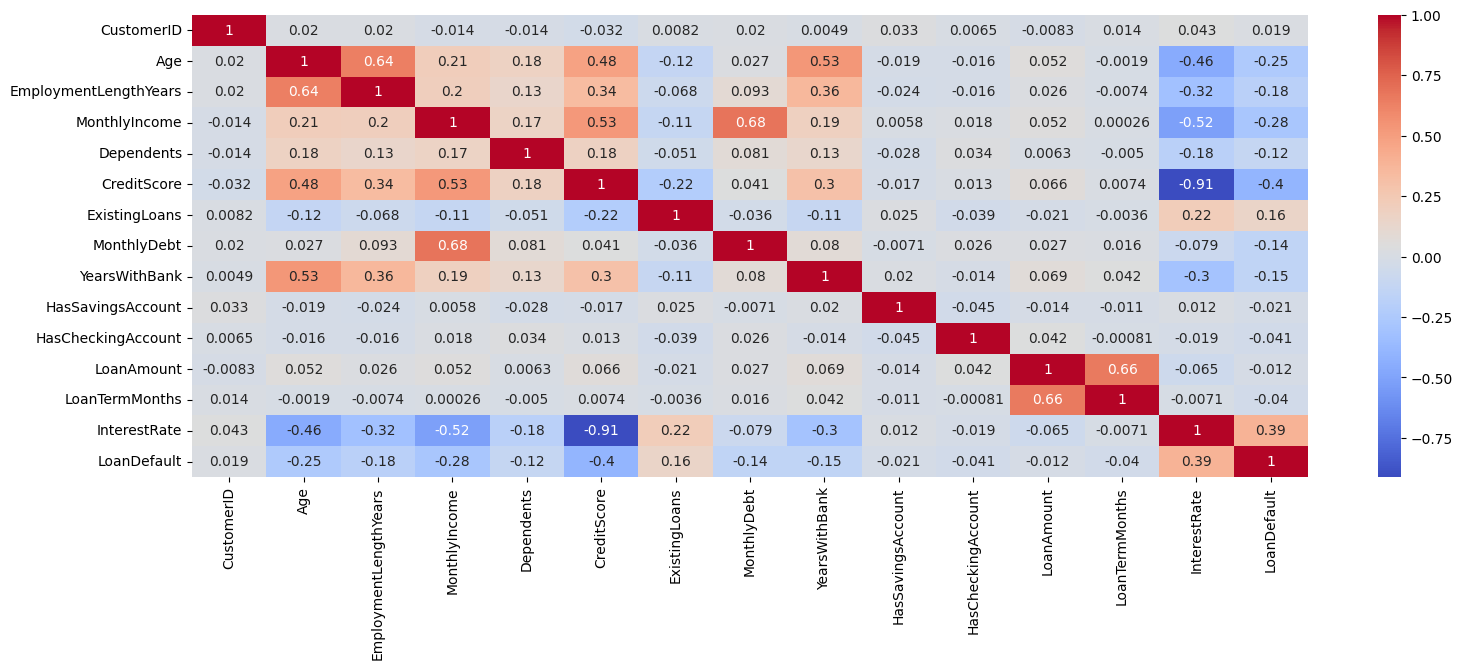

In [15]:
# Correlation

# Pairplot
print("Pairplot")
sns.pairplot(clean_df)
plt.show()

# Heatmap
print("Heatmap")
num_df = clean_df.select_dtypes(include=["number"])
plt.figure(figsize=(18,6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.show()

**Correlation heatmap**

Shows how strongly two numeric variables are related to each other, using a value between:
- +1 → perfect positive relationship
- 0 → no linear relationship
- -1 → perfect negative relationship

Strong Positive Correlations
- Monthly Income ↔ Monthly Debt (~ +0.68): Higher income customers tend to have higher monthly financial commitments.
- Loan Amount ↔ Loan Term Months (~ +0.66): Larger loans are usually tied to longer repayment durations.
- Age ↔ Employment Length (~ +0.64): Older customers generally have more years of work experience.
- Age ↔ Years With Bank (~ +0.53): Older customers tend to maintain longer relationships with the bank.

Strong Negative Correlations
- Credit Score ↔ Interest Rate (~ -0.91): Higher credit scores strongly correlate with lower interest rates.
- Monthly Income ↔ Interest Rate (~ -0.52): Higher income customers are more likely to receive loans at lower interest rates.
- Age ↔ Interest Rate (~ -0.46): Older customers tend to receive lower interest rates.

Correlations Related to Loan Default
- Interest Rate ↔ Loan Default (+0.39): Higher interest rates are associated with a higher chance of default.
- Credit Score ↔ Loan Default (-0.40): Lower credit scores correlate with increased likelihood of default.
- Monthly Income ↔ Loan Default (-0.28): Lower-income applicants show a slightly higher risk of default.
- Age ↔ Loan Default (-0.25): Younger applicants are slightly more likely to default compared to older ones.

# Feature Engineering

## Sentiment

## Normalize Numerical Features

## Encode Categorical Features